In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('tox.csv')
df.set_index('inchikey', inplace=True)
df.head()

,NR.AhR,NR.AR,NR.AR.LBD,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53
inchikey,,,,,,,,,,,,
AAALVYBICLMAMA-UHFFFAOYSA-N,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0
AAEVYOVXGOFMJO-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAFNEINEQRQMTF-WUUYCOTASA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAFXQFIGKBLKMC-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAIBYZBZXNWTPP-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
len(df)

8975

In [9]:
# Percentage of missing values by column
na_col = df.isna().mean() * 100
na_col

NR.AhR           15.442897
NR.AR             7.119777
NR.AR.LBD        13.604457
NR.Aromatase     25.359331
NR.ER            20.791086
NR.ER.LBD        10.685237
NR.PPAR.gamma    16.757660
SR.ARE           24.880223
SR.ATAD5          9.303621
SR.HSE           16.590529
SR.MMP           25.147632
SR.p53           13.036212
dtype: float64

/tmp/ipykernel_18414/3964285317.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.columns, rotation='vertical')


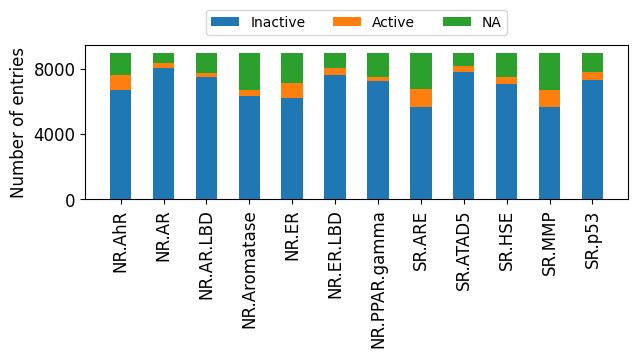

In [12]:
endpoints=df.columns.tolist()
label0=list(np.sum(df.values == 0, axis=0))
label1=list(np.sum(df.values == 1, axis=0))
labelNA=list(np.sum(np.isnan(df.values), axis=0))

weight_counts = {
    "Inactive":label0,
    "Active":label1,
    "NA":labelNA,
}
width = 0.5

fig, ax = plt.subplots(figsize=(7, 2))
bottom = np.zeros(12)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(endpoints, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

#ax.set_title("Labels in the enpoints")
ax.legend(loc="center", bbox_to_anchor=(0.5, 1.15), ncol=len(weight_counts))

ax.set_xticklabels(df.columns, rotation='vertical')
plt.yticks(range(0, len(df)+1, 4000))
plt.ylabel("Number of entries", fontsize=12)
plt.tick_params(axis='both', labelsize=12) 

#plt.savefig('labelsTox21.pdf', bbox_inches='tight')
plt.show()

In [13]:
ratio_active_inactive=np.sum(df.values == 1, axis=0)/np.sum(df.values == 0, axis=0)
labels_tox=pd.DataFrame({'endpoint':endpoints, 'Active':label1, 'Inactive':label0, 'NA':labelNA, 'Active/Inactive':ratio_active_inactive.round(3)})
labels_tox
#labels_tox.to_csv('labels_tox.csv', index=False)

,endpoint,Active,Inactive,NA,Active/Inactive
0,NR.AhR,890,6699,1386,0.133
1,NR.AR,325,8011,639,0.041
2,NR.AR.LBD,250,7504,1221,0.033
3,NR.Aromatase,366,6333,2276,0.058
4,NR.ER,876,6233,1866,0.141
5,NR.ER.LBD,386,7630,959,0.051
6,NR.PPAR.gamma,235,7236,1504,0.032
7,SR.ARE,1110,5632,2233,0.197
8,SR.ATAD5,330,7810,835,0.042
9,SR.HSE,411,7075,1489,0.058


interval columns not set, guessing: ['NR.AhR', 'NR.AR', 'NR.AR.LBD', 'NR.Aromatase', 'NR.ER', 'NR.ER.LBD', 'NR.PPAR.gamma', 'SR.ARE', 'SR.ATAD5', 'SR.HSE', 'SR.MMP', 'SR.p53']


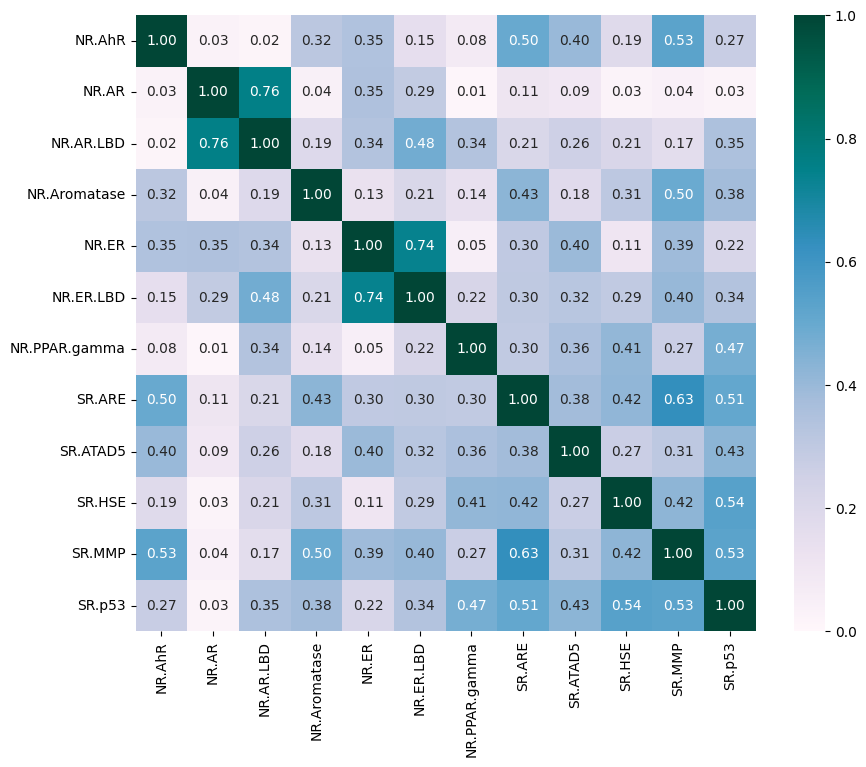

In [20]:
from phik import phik_matrix
import seaborn as sns

phi_matrix = phik_matrix(df)
plt.figure(figsize=(10, 8))
sns.heatmap(phi_matrix, annot=True, fmt=".2f", cmap='PuBuGn', vmin=0, vmax=1)
#plt.title('Phi Coefficient Matrix')
#plt.savefig('phi_matrix.pdf', bbox_inches='tight')
plt.show()